# **菊安酱与菜菜的Python机器学习可视化**

## 第八期：分组（Groups）

### 扫码加好友，回复K进群，获取本课的课件~！

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/%E4%BA%8C%E7%BB%B4%E7%A0%812.png"  width=200>

### 课程咨询 → 小可爱微信：18506299192

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

## <center>每周三晚上8点直播1小时，完整版2小时周日上线~</center>
## <center>单数周菜菜直播，双数周菊安酱直播，哔哩哔哩与peixun.net同步开启</center>

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

**注意：无法在matpotlib和seaborn中显示中文或者负号的问题**  
如果你遇见了，请参考链接，可永久解决中文和负号问题：https://www.jianshu.com/p/914b5f4ce6bf  
或者你也可以在每次需要负号和中文的时候执行下面的代码来避免中文或负号显示不出来：

In [1]:
# import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif']=['Simhei'] #显示中文
# plt.rcParams['axes.unicode_minus']=False   #显示负号

## **第八章 分组（Groups）**

分组图就是描述组间差异的一种图形。在进行探索性数据分析及对聚类或分类问题的验证中有着重要的应用

常用的分组图有：树状图、簇状图、安德鲁曲线图、平行坐标图……

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week8%20Groups/%E5%88%86%E7%BB%84%E5%9B%BE.png'>

### <font color=bule> 49/50 安德鲁斯曲线（Andrews Curve）

**什么是Andrews曲线？**       
Andrews曲线是一种可视化高维数据结构的方法。（多维数据可视化是指通过一些手段将高维的数据展示在二维的平面中）       
具体的做法就是将每个样本的属性值转化为傅里叶序列的系数来创建曲线，属于同一类别的曲线通常比较相似，我们可以通过将每一类曲线标记不同颜色来可视化聚类数据。     

Andrews曲线计算方式：     
$f（t）= x_1 / sqrt（2）+ x_2 sin（t）+ x_3 cos（t）+x_4 sin（2t）+ x_5 cos（2t）+ ......   $    
其中x系数对应于每个维度的值，且$-\pi<t<\pi$     
每一条样本绘制成一条Andrews曲线.

Andrews曲线的官方说明：     
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.andrews_curves.html

Andrews曲线的用途：    
- 可视化高维数据，起到聚类作用     
- 异常样本检测。同一类别的曲线基本一致，若有不一致曲线则为异常记录。

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week8%20Groups/%E5%AE%89%E5%BE%B7%E9%B2%81%E6%96%AF%E6%9B%B2%E7%BA%BF.png' width=600>

### 1.导入需要的绘图包

In [53]:
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves  #安德鲁斯曲线

### 2.认识绘制安德鲁斯曲线的函数

**andrews_curves**    
函数功能：生成安德鲁斯曲线的matplotlib图，用于可视化多元数据的聚类    

重要参数：   
> frame：DataFrame类型的数据   
> class_column：聚类依据的列   
> ax：matplotlib子图对象，默认为None    
> samples：每条安德鲁斯曲线上的样本点数，默认为200   
> color：颜色    
> colormap：光谱   

In [54]:
andrews_curves?

Signature:
andrews_curves(
    ['frame', 'class_column', 'ax=None', 'samples=200', 'color=None', 'colormap=None', '**kwds'],
)
Docstring:
Generates a matplotlib plot of Andrews curves, for visualising clusters of
multivariate data.

Andrews curves have the functional form:

f(t) = x_1/sqrt(2) + x_2 sin(t) + x_3 cos(t) +
       x_4 sin(2t) + x_5 cos(2t) + ...

Where x coefficients correspond to the values of each dimension and t is
linearly spaced between -pi and +pi. Each row of frame then corresponds to
a single curve.

Parameters
----------
frame : DataFrame
    Data to be plotted, preferably normalized to (0.0, 1.0)
class_column : Name of the column containing class names
ax : matplotlib axes object, default None
samples : Number of points to plot in each curve
color: list or tuple, optional
    Colors to use for the different classes
colormap : str or matplotlib colormap object, default None
    Colormap to select colors from. If string, load colormap with that name
    from matplo

### 3.绘制鸢尾花数据集的Andrews曲线

In [55]:
from sklearn.datasets import load_iris  #导入鸢尾花数据集

In [56]:
iris = load_iris()  #实例化数据集
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [59]:
pd.DataFrame(iris.data,columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [60]:
X = pd.DataFrame(iris.data,columns = iris.feature_names) #提取特征并将其变为 DF格式 
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [61]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [62]:
y = pd.DataFrame(iris.target,columns=['species']) #提取标签并将其变为 DF格式

In [63]:
y

,species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [64]:
data = pd.concat([X,y],axis=1)  #将特征和标签拼接
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


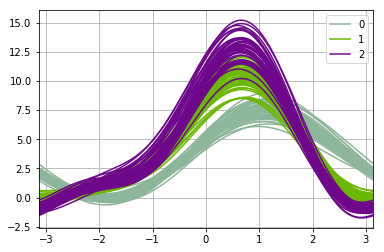

In [65]:
#绘制鸢尾花数据集的Andrews曲线
andrews_curves(data,'species');

In [66]:
[*enumerate(iris.target_names)] #返回索引和值，放在元祖中

[(0, 'setosa'), (1, 'versicolor'), (2, 'virginica')]

**我们来看一下iris三种花的实际形状**

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week8%20Groups/iris%E5%AF%B9%E6%AF%94%E5%9B%BE.png' width=800>

### 4.查看绘图需要的数据集

In [67]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


In [68]:
df.shape

(32, 14)

对于这个数据集相信大家已经非常熟悉了哈~~~

In [69]:
name = ['英里每加仑','气缸数量','排量','总马力','驱动轴比'
        ,'重量','1/4英里所用时间','引擎形状','变速器','前进档数'
        ,'化油器数量','用油是否高效','汽车','汽车名称']

In [70]:
[*zip(df.columns,name)]

[('mpg', '英里每加仑'),
 ('cyl', '气缸数量'),
 ('disp', '排量'),
 ('hp', '总马力'),
 ('drat', '驱动轴比'),
 ('wt', '重量'),
 ('qsec', '1/4英里所用时间'),
 ('vs', '引擎形状'),
 ('am', '变速器'),
 ('gear', '前进档数'),
 ('carb', '化油器数量'),
 ('fast', '用油是否高效'),
 ('cars', '汽车'),
 ('carname', '汽车名称')]

In [71]:
#删除与绘图无关的文本型特征
df.drop(['cars', 'carname'], axis=1, inplace=True)

In [72]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1


### 5.绘制目标图形

更多colormap选择参考这里：https://matplotlib.org/examples/color/colormaps_reference.html

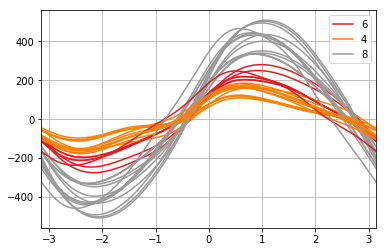

In [73]:
andrews_curves(df,'cyl',colormap='Set1');

#### 给图形添加装饰

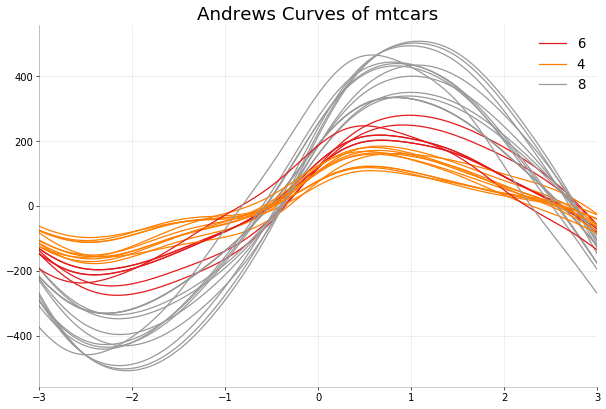

In [78]:
plt.figure(figsize=(12,8),dpi=60) #创建画布并设定画布大小   
andrews_curves(df, 'cyl', colormap='Set1') #绘制 Andrews曲线   

#弱化边框
plt.gca().spines['top'].set_alpha(0)      #去掉上边框
plt.gca().spines['right'].set_alpha(0)    #去掉右边框
plt.gca().spines['left'].set_alpha(.3)    #弱化左边框
plt.gca().spines['bottom'].set_alpha(.3)  #弱化下边框 

#添加装饰
plt.title('Andrews Curves of mtcars', fontsize=22) #添加标题
plt.xticks(fontsize=12) #设定x轴刻度字体大小
plt.yticks(fontsize=12) #设定y轴刻度字体大小
plt.xlim(-3,3)   #设定x轴刻度范围
plt.grid(alpha=0.3) #配置网格线并设定网格线的透明度
plt.legend(fontsize=16,frameon=False)  #去掉图例的边框
plt.show() #本地显示图形

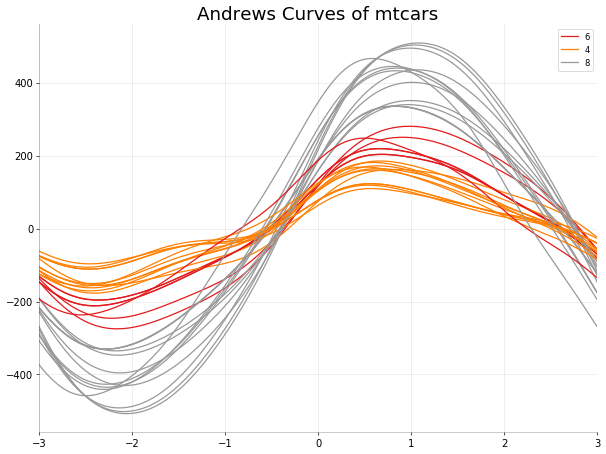

In [79]:
#源代码

# Import
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")#导入原始数据集
df.drop(['cars', 'carname'], axis=1, inplace=True) #删除无关列

# Plot
plt.figure(figsize=(12,9), dpi= 60)  #创建画布并设定画布的大小
andrews_curves(df, 'cyl', colormap='Set1') #绘制Andrews曲线

# Lighten borders
plt.gca().spines["top"].set_alpha(0)    
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Andrews Curves of mtcars', fontsize=22)#添加标题
plt.xlim(-3,3) #设定X轴的范围
plt.grid(alpha=0.3) #配置网格线并设定网格线的透明度
plt.xticks(fontsize=12) #设定X轴刻度大小
plt.yticks(fontsize=12) #设定Y轴刻度大小
plt.show()

### 6.图形解读

- 根据气缸数绘制出了3种不同的Andrews曲线(共32条)   
- 从3中曲线中可以看出，气缸数为4和6的这两类车各项属性比较接近，气缸数为8的车明显与他们不同   

#### 探索其他分类变量的聚类情况

In [80]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1


In [81]:
#提取出所有分类变量的特征
cols = [ 'cyl', 'vs', 'am', 'gear','carb', 'fast']

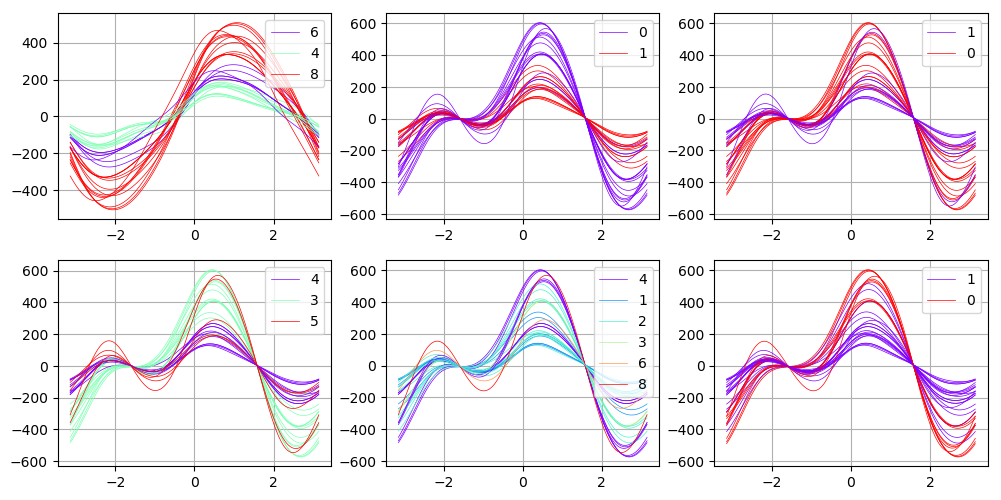

In [83]:
pl=plt.figure(figsize=(12,6),dpi=100)
for i in range(len(cols)):
    ax = pl.add_subplot(2,3,i+1)
    andrews_curves(df,cols[i],ax=ax,colormap='rainbow',linewidth=.5)

### <font color=bule> 50/50 平行坐标（Parallel Coordinates）

平行坐标可以用来同时比较多个特征并查看特征之间的相互关系。所以平行坐标常常被用来可视化多分类的数值型数据。   
使用平行坐标时，每个点用线段联接。每个垂直的线代表一个属性。一组联接的线段表示一个数据点。可能是一类的数据点会更加接近。

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week8%20Groups/%E5%B9%B3%E8%A1%8C%E5%9D%90%E6%A0%87%E5%9B%BE.png' width=600>

- 横坐标：所有特征
- 纵坐标：特征值  
- 图例：不同类别（标签类别）

### 1.导入绘制图形的包

In [84]:
import pandas as pd
from pandas.plotting import parallel_coordinates #平行坐标

### 2.认识绘制平行坐标的函数

**parallel_coordinates**   
函数功能：绘制平行坐标   

重要参数：   
> 'frame'：DF格式的数据   
> 'class_column'：标签列   
> 'color=None'：颜色    
> 'colormap=None'：色谱    
> 'axvlines=True'：控制是否添加垂直线的参数   
> 'sort_labels=False'：对class_column标签进行排序，在分配颜色时很有用  

In [86]:
# parallel_coordinates?

### 3.绘制鸢尾花数据集的平行坐标    

In [87]:
from sklearn.datasets import load_iris

In [88]:
iris = load_iris()  #实例化数据集
X = pd.DataFrame(iris.data,columns = iris.feature_names) #提取特征并将其变为 DF格式 
y = pd.DataFrame(iris.target,columns=['species']) #提取标签并将其变为 DF格式
data = pd.concat([X,y],axis=1)  #将特征和标签拼接
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


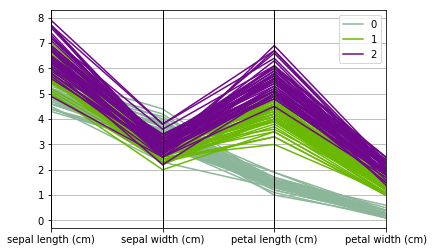

In [89]:
parallel_coordinates(data,'species');

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week8%20Groups/iris%E5%AF%B9%E6%AF%94%E5%9B%BE.png' width=800>

### 4.绘制目标图形

In [90]:
#导入绘图所需数据集
df_final = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/diamonds_filter.csv")

In [91]:
df_final.head()

,carat,depth,table,clarity,cut
0,0.73,64.6,60.0,4.0,Fair
1,0.73,66.9,54.0,0.0,Fair
2,0.50,66.5,58.0,4.0,Fair
3,0.70,64.5,57.0,4.0,Fair
4,1.01,65.3,59.0,2.0,Fair


In [96]:
df_final.table.value_counts()

59.0    111
58.0    105
56.0     91
57.0     80
55.0     57
60.0     53
61.0     29
54.0     26
62.0     20
53.0     10
63.0      5
64.0      4
56.1      1
53.2      1
52.0      1
55.8      1
60.2      1
55.1      1
52.8      1
51.0      1
Name: table, dtype: int64

In [92]:
df_final.shape

(599, 5)

In [93]:
df_final.describe()

,carat,depth,table,clarity
count,599.000000,599.000000,599.000000,599.000000
mean,0.901770,62.815359,57.696494,3.455760
std,0.528365,2.191752,2.201247,1.779941
min,0.250000,58.000000,51.000000,0.000000
25%,0.500000,61.300000,56.000000,2.000000
50%,0.900000,62.300000,58.000000,3.000000
75%,1.140000,64.400000,59.000000,5.000000
max,3.650000,71.300000,64.000000,7.000000


#### 绘制平行坐标

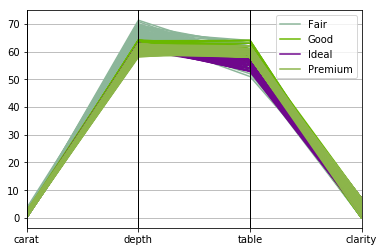

In [94]:
parallel_coordinates(df_final, 'cut');

#### 添加装饰

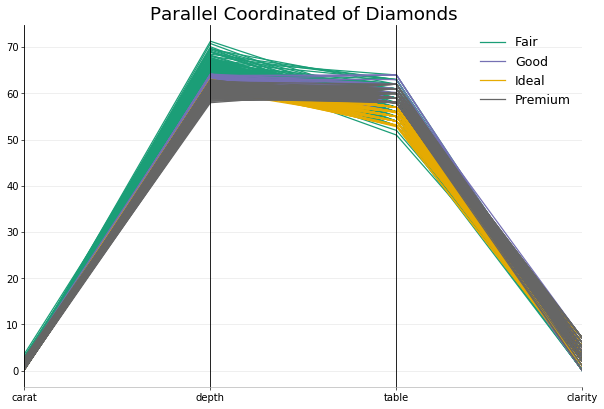

In [95]:
plt.figure(figsize=(12,8), dpi= 60) #创建画布并设定画布大小
parallel_coordinates(df_final, 'cut', colormap='Dark2') #绘制平行坐标

# 弱化边框
plt.gca().spines["top"].set_alpha(0)      #去掉上边框
plt.gca().spines["right"].set_alpha(0)    #去掉右边框
plt.gca().spines["left"].set_alpha(.3)    #弱化左边框
plt.gca().spines["bottom"].set_alpha(.3)  #弱化下边框

#添加装饰
plt.title('Parallel Coordinated of Diamonds', fontsize=22) #设置标题
plt.xticks(fontsize=12)  #设置X轴刻度字体大小
plt.yticks(fontsize=12) #设置Y轴刻度字体大小
plt.legend(frameon=False,fontsize=15) #去掉图例边框并设定图例字体大小
plt.grid(alpha=0.3)  #配置网格线并设定网格线透明度
plt.show() #本地显示图片

从图形中可以看出，depth和table这两个特征对于标签cut贡献比较大   
对于carat和clarity这两个特征，几乎所有的点都重合到了一起，那是不是就说明这两个特征对于我们的标签来说，是不重要的？   
请大家再回过头来看一下我们的原始数据集     
你会发现，我们的原始数据集存在量纲不统一的问题    

In [97]:
df_final.head()

,carat,depth,table,clarity,cut
0,0.73,64.6,60.0,4.0,Fair
1,0.73,66.9,54.0,0.0,Fair
2,0.50,66.5,58.0,4.0,Fair
3,0.70,64.5,57.0,4.0,Fair
4,1.01,65.3,59.0,2.0,Fair


In [98]:
df_final.describe()

,carat,depth,table,clarity
count,599.000000,599.000000,599.000000,599.000000
mean,0.901770,62.815359,57.696494,3.455760
std,0.528365,2.191752,2.201247,1.779941
min,0.250000,58.000000,51.000000,0.000000
25%,0.500000,61.300000,56.000000,2.000000
50%,0.900000,62.300000,58.000000,3.000000
75%,1.140000,64.400000,59.000000,5.000000
max,3.650000,71.300000,64.000000,7.000000


In [99]:
from sklearn.preprocessing import MinMaxScaler as MMS   #导入归一化的包,将数据归一到[0,1]

In [100]:
X = MMS().fit_transform(df_final.iloc[:,:-1])

In [101]:
X

array([[0.14117647, 0.4962406 , 0.69230769, 0.57142857],
       [0.14117647, 0.66917293, 0.23076923, 0.        ],
       [0.07352941, 0.63909774, 0.53846154, 0.57142857],
       ...,
       [0.09411765, 0.20300752, 0.61538462, 0.42857143],
       [0.36764706, 0.19548872, 0.76923077, 0.71428571],
       [0.37647059, 0.2481203 , 0.61538462, 0.28571429]])

In [102]:
df_ = pd.concat([pd.DataFrame(X,columns=df_final.columns[:-1]),df_final.iloc[:,-1]],axis=1)

In [103]:
df_.head()

,carat,depth,table,clarity,cut
0,0.141176,0.496241,0.692308,0.571429,Fair
1,0.141176,0.669173,0.230769,0.000000,Fair
2,0.073529,0.639098,0.538462,0.571429,Fair
3,0.132353,0.488722,0.461538,0.571429,Fair
4,0.223529,0.548872,0.615385,0.285714,Fair


#### 绘制去量纲之后的平行坐标

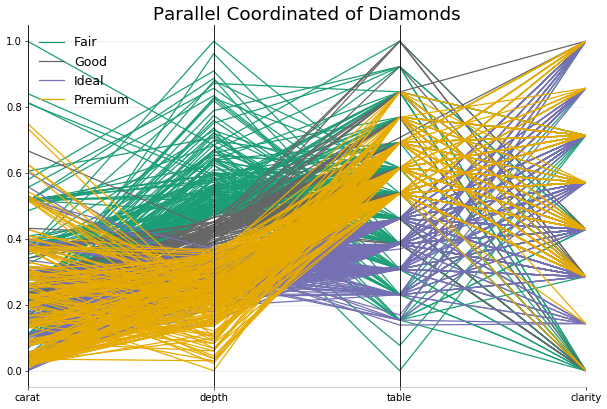

In [104]:
pl=plt.figure(figsize=(12,8), dpi= 60) #创建画布并设定画布大小
parallel_coordinates(df_, 'cut', colormap='Dark2',sort_labels=True) #绘制平行坐标

# 弱化边框
plt.gca().spines["top"].set_alpha(0)      #去掉上边框
plt.gca().spines["right"].set_alpha(0)    #去掉右边框
plt.gca().spines["left"].set_alpha(.3)    #弱化左边框
plt.gca().spines["bottom"].set_alpha(.3)  #弱化下边框

#添加装饰
plt.title('Parallel Coordinated of Diamonds', fontsize=22) #设置标题
plt.xticks(fontsize=12)  #设置X轴刻度字体大小
plt.yticks(fontsize=12) #设置Y轴刻度字体大小
plt.legend(frameon=False,fontsize=15) #去掉图例边框并设定图例字体大小
plt.grid(alpha=0.3)  #配置网格线并设定网格线透明度
plt.show() #本地显示图片

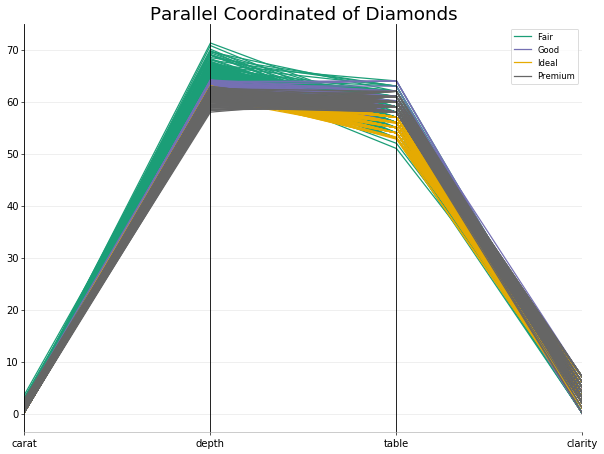

In [105]:
#源代码
# Import Data
df_final = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/diamonds_filter.csv")

# Plot
plt.figure(figsize=(12,9), dpi= 60)
parallel_coordinates(df_final, 'cut', colormap='Dark2')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Parallel Coordinated of Diamonds', fontsize=22)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()